In [1]:
import datetime as dt
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objects as go
import yfinance as yf
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)

In [2]:
df = yf.download("^NSEI", start="2015-01-01", end="2025-12-31", auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2025-12-23,26177.150391,26177.150391,26233.550781,26119.050781,26205.199219,216600
2025-12-24,26142.099609,26142.099609,26236.400391,26123.000000,26170.650391,188800
2025-12-26,26042.300781,26042.300781,26144.199219,26008.599609,26121.250000,142200
2025-12-29,25942.099609,25942.099609,26106.800781,25920.300781,26063.349609,234300
2025-12-30,25938.849609,25938.849609,25976.750000,25878.000000,25940.900391,396900


In [7]:
Close = df.Close
Close.head()

Ticker,^NSEI
Date,
2015-01-02,8395.450195
2015-01-05,8378.400391
2015-01-06,8127.350098
2015-01-07,8102.100098
2015-01-08,8234.599609


# Here I'm going to create Moving Average(MA)
For this I'm gonna use pandas.rolling function and specify the rolling window parameter.

In [10]:
df['MA50'] = df['Close']['^NSEI'].rolling(window=50).mean()
df['MA200'] = df['Close']['^NSEI'].rolling(window=200).mean()
df['MA50'].head(200)
df['MA200'].head(400)

Date
2015-01-02            NaN
2015-01-05            NaN
2015-01-06            NaN
2015-01-07            NaN
2015-01-08            NaN
                 ...     
2016-08-16    7870.988252
2016-08-17    7872.800249
2016-08-18    7874.907998
2016-08-19    7876.765249
2016-08-22    7878.608252
Name: MA200, Length: 400, dtype: float64

# Now creating plotly fig

In [143]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1, subplot_titles=('^NSEI', 'Volume'),
                    row_width=[0.1,0.7])

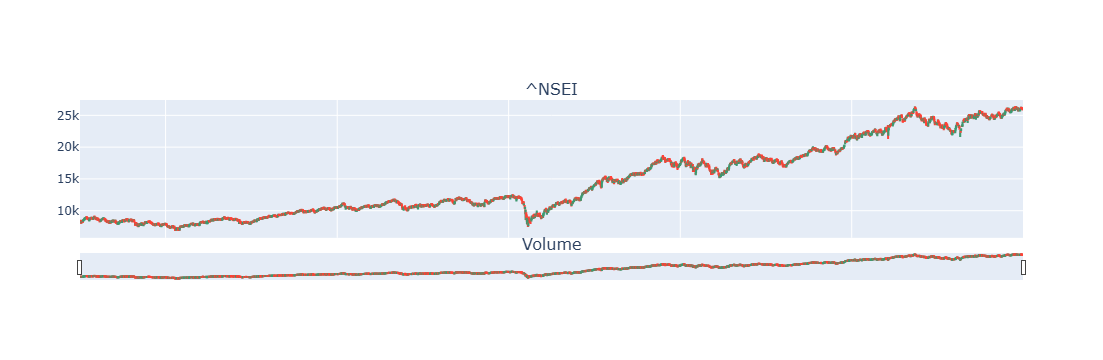

In [145]:
fig.add_trace(go.Candlestick(x=df.index, open=df['Open']['^NSEI'], high=df['High']['^NSEI'], 
                             low=df['Low']['^NSEI'], close=df['Close']['^NSEI'], name='OHLC'),
             row=1, col=1)

# Plotting MA50 and MA200

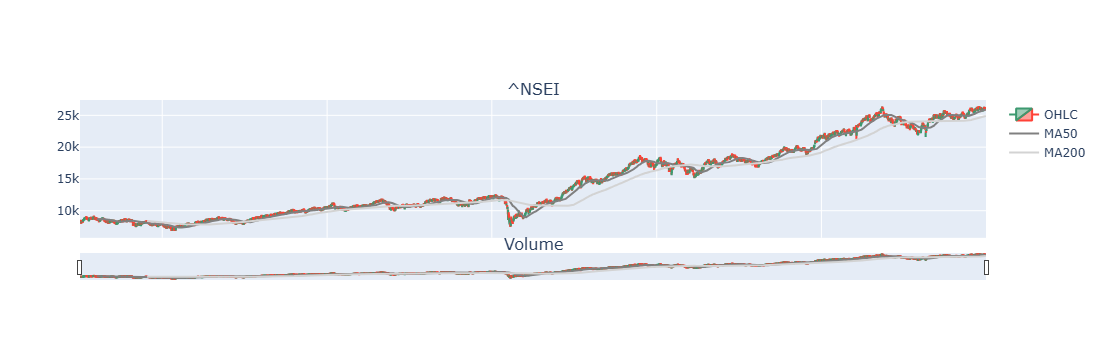

In [147]:
fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], marker_color='grey', name='MA50'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['MA200'], marker_color='lightgrey', name='MA200'), row=1, col=1)